In [1]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
import string
import re

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
#filelist is a dictionary where key is filename and value is lemmatized token list corresponding to that document
#classes contains all the classes names
#doc contains all the file names
#class_file is a dictionary which contains class names as key and list of all the files corresponding to that class as value
#file_vocab_dict contains filename as key and content of that file as value
import os
folders=os.listdir('20_newsgroups/')
classes=[]
filelist=[]
class_file={}
doc=[]
file_vocab_dict={}
# count=0
for directory in folders:
    if directory=='comp.graphics' or directory=='sci.med' or directory =='talk.politics.misc' or directory=='rec.sport.hockey' or directory=='sci.space':
        classes.append(directory)
        files=os.listdir('20_newsgroups/'+directory)
        files=files[1:]
        temp={}
        for i in files:
            if i not in temp:
                temp[i]=1
            doc.append(i)
        class_file[directory]=temp
        for file in files:
            f=open('20_newsgroups/'+directory+"/"+file)
            myfile=f.read()
            myfile=myfile.lower()
            myfile=myfile.translate(str.maketrans(" "," ",string.punctuation))
#         myfile=re.sub(r"\d+","",myfile)
            if file not in file_vocab_dict.keys():
                file_vocab_dict[file]=myfile
            filelist.append(myfile)

In [52]:
import random
import sklearn
from sklearn.model_selection import train_test_split
shuffled_docs=[]
shuffled_docs=doc
random.shuffle(shuffled_docs)
print("Enter the percent of documents you want in training set: ")
amt=int(input())
test_amt=amt/100
test1, train1 = sklearn.model_selection.train_test_split(shuffled_docs,test_size=.8)
# print(len(test))
# print(len(train))
# print(test)
train={}
test={}
for i in train1:
    if i not in train:
        train[i]=1
for i in test1:
    if i not in test:
        test[i]=1
        

Enter the percent of documents you want in training set: 
80


In [53]:
print(len(train1))
print(len(test1))

3996
999


In [54]:
# print(test)
#class_train contains class wise training document
t1={}
t2={}
t3={}
t4={}
t5={}
class_train={}

for i in train1:
    if i in class_file['comp.graphics']:
        if i not in t1:
            t1[i]=1
    elif i in class_file['sci.med']:
        if i not in t2:
            t2[i]=1
    elif i in class_file['talk.politics.misc']:
        if i not in t3:
            t3[i]=1
    elif i in class_file['rec.sport.hockey']:
        if i not in t4:
            t4[i]=1
    elif i in class_file['sci.space']:
        if i not in t5:
            t5[i]=1
            
        
class_train['comp.graphics']=t1
class_train['sci.med']=t2
class_train['talk.politics.misc']=t3
class_train['rec.sport.hockey']=t4
class_train['sci.space']=t5

In [55]:
print(class_file)

{'comp.graphics': {'37913': 1, '37914': 1, '37915': 1, '37916': 1, '37917': 1, '37918': 1, '37919': 1, '37920': 1, '37921': 1, '37922': 1, '37923': 1, '37924': 1, '37925': 1, '37926': 1, '37927': 1, '37928': 1, '37929': 1, '37930': 1, '37931': 1, '37932': 1, '37933': 1, '37934': 1, '37935': 1, '37936': 1, '37937': 1, '37938': 1, '37939': 1, '37940': 1, '37941': 1, '37942': 1, '37943': 1, '37944': 1, '37945': 1, '37946': 1, '37947': 1, '37948': 1, '37949': 1, '37950': 1, '37951': 1, '37952': 1, '37953': 1, '37954': 1, '37955': 1, '37956': 1, '37957': 1, '37958': 1, '37959': 1, '37960': 1, '37961': 1, '37962': 1, '37963': 1, '38099': 1, '38214': 1, '38215': 1, '38216': 1, '38217': 1, '38218': 1, '38219': 1, '38220': 1, '38221': 1, '38222': 1, '38223': 1, '38224': 1, '38225': 1, '38226': 1, '38227': 1, '38228': 1, '38229': 1, '38230': 1, '38231': 1, '38232': 1, '38233': 1, '38234': 1, '38235': 1, '38236': 1, '38237': 1, '38238': 1, '38239': 1, '38240': 1, '38241': 1, '38242': 1, '38243': 

In [56]:
# print(test)
#class_test contains class wise testing documents
tt1={}
tt2={}
tt3={}
tt4={}
tt5={}
class_test={}

for i in test1:
    if i in class_file['comp.graphics']:
        if i not in tt1:
            tt1[i]=1
    elif i in class_file['sci.med']:
        if i not in tt2:
            tt2[i]=1
    elif i in class_file['talk.politics.misc']:
        if i not in tt3:
            tt3[i]=1
    elif i in class_file['rec.sport.hockey']:
        if i not in tt4:
            tt4[i]=1
    elif i in class_file['sci.space']:
        if i not in tt5:
            tt5[i]=1
            
        
class_test['comp.graphics']=tt1
class_test['sci.med']=tt2
class_test['talk.politics.misc']=tt3
class_test['rec.sport.hockey']=tt4
class_test['sci.space']=tt5

In [61]:
print(len(class_test['sci.med'])+len(class_test['comp.graphics'])+len(class_test['sci.space'])+len(class_test['talk.politics.misc'])+len(class_test['rec.sport.hockey']))

999


In [73]:
print(file_vocab_dict['178913'])

newsgroups capoliticstalkpoliticsmisc
path cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmuedufs7ececmuedueuropaenggtefsdcomhowlandrestonansnetbogussuranetnewsfeed1peachneteduumneducsusedunetcomcomphil
from philnetcomcom phil ronzone
subject re freedom of association
messageid philc5v0vo7junetcomcom
organization generally in favor of but mostly random
references pdb059210493135728kilimanjarojplnasagov
date thu 22 apr 1993 004747 gmt
lines 174

in article pdb059210493135728kilimanjarojplnasagov pdb059ipljplnasagov paul bartholomew writes

a very well put together post i disagree with several key points but the
post is an excellent one with which to engage in discourse

    there has been much discussion recently about the right to
    freedom of association mr cramer and mr ronzone appear to
    take an absolutist position on this rightthat it is a
    fundamental human right perhaps the fundamental human right
    and that it supersedes other rights such as the right to an
    equa

In [74]:
#vocab1 contains all the vocabulary terms
#vocab contains all the unique vocaulary terms
#final_class_test contains all the testing docs and their lemmatized tokens
#final_class_train contains all the training docs and their lemmatized tokens
#tf_dict contains each doc as key and a dictionary of term,tf pair for each term corresponding to each doc as value
import pickle
from num2words import num2words
lem=WordNetLemmatizer()
final_list={}
tf_dict={}
idf_dict1={}
vocab1=[]
class1=[]
class2=[]
class3=[]
class4=[]
class5=[]
final_class_test={}
final_class_train={}
from nltk.tokenize import word_tokenize   
stop_words = set(stopwords.words('english')) 
# ind=0
# index=0
for i in file_vocab_dict:
    t=file_vocab_dict[i]
    word_tokens = word_tokenize(t)
    mylist = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            mylist.append(w) 
    temp1=[]
    temp2=[]
    for tokens in mylist:
        if(tokens.isdecimal()==True):
            tokens=num2words(tokens)
        word=lem.lemmatize(tokens) 
        temp1.append(word) 
    if i in class_train['comp.graphics']:
        l=[]
        for w in temp1:
            class1.append(w)
            l.append(w)
        final_class_train[i]=l
    elif i in class_train['sci.med']:
        ll=[]
        for w in temp1:
            class2.append(w)
            ll.append(w)
        final_class_train[i]=ll
    elif i in class_train['talk.politics.misc']:
        lll=[]
        for w in temp1:
            class3.append(w)
            lll.append(w)
        final_class_train[i]=lll
    elif i in class_train['rec.sport.hockey']:
        llll=[]
        for w in temp1:
            class4.append(w)
            llll.append(w)
        final_class_train[i]=llll
    elif i in class_train['sci.space']:
        lllll=[]
        for w in temp1:
            class5.append(w)
            lllll.append(w)
        final_class_train[i]=lllll
    elif i in class_test['comp.graphics']:
        t=[]
        for w in temp1:
            t.append(w)
        final_class_test[i]=t
    elif i in class_test['sci.med']:
        tt=[]
        for w in temp1:
            tt.append(w)
        final_class_test[i]=tt
    elif i in class_test['talk.politics.misc']:
        ttt=[]
        for w in temp1:
            ttt.append(w)
        final_class_test[i]=ttt
    elif i in class_test['rec.sport.hockey']:
        tttt=[]
        for w in temp1:
            tttt.append(w)
        final_class_test[i]=tttt
    elif i in class_test['sci.space']:
        ttttt=[]
        for w in temp1:
            ttttt.append(w)
        final_class_test[i]=ttttt
    temp2.append(word)
    temp2=set(temp2)
    if i in train1:
        for i1 in temp2:
            if i1 not in idf_dict1:
                idf_dict1[i1]=1
            else:
                idf_dict1[i1]=idf_dict1[i1]+1 
    temp_dict={}
    for i2 in temp1:
        vocab1.append(i2)
        if i2 not in temp_dict:
            temp_dict[i2]=temp1.count(i2)
    
    tf_dict[i]=temp_dict   
#     index+=1

In [75]:
print(len(final_class_train))

3996


In [76]:
# print(class_file['comp.graphics'])
# print(class1)
# print(final_list['178913'])

In [77]:
# print(tf_dict["178913"])
#class_final is a dictionary where each class is a key and list of all the terms of that class acts as value
c1={}
c2={}
c3={}
c4={}
c5={}
train_vocab=[]
for i in class1:
    train_vocab.append(i)
    if i not in c1:
        c1[i]=1
for i in class2:
    train_vocab.append(i)
    if i not in c2:
        c2[i]=1
for i in class3:
    train_vocab.append(i)
    if i not in c3:
        c3[i]=1
for i in class4:
    train_vocab.append(i)
    if i not in c4:
        c4[i]=1
for i in class5:
    train_vocab.append(i)
    if i not in c5:
        c5[i]=1
        
class_final={}
class_final['comp.graphics']=c1
class_final['sci.med']=c2
class_final['talk.politics.misc']=c3
class_final['rec.sport.hockey']=c4
class_final['sci.space']=c5

class_with_all_terms={}
class_with_all_terms['comp.graphics']=class1
class_with_all_terms['sci.med']=class2
class_with_all_terms['talk.politics.misc']=class3
class_with_all_terms['rec.sport.hockey']=class4
class_with_all_terms['sci.space']=class5

In [78]:
print(len(class_with_all_terms['comp.graphics']))
print(len(class_final['comp.graphics']))

149015
20550


In [79]:
# print(class_final['sci.med'])
train_vocab_unique={}
for i in train_vocab:
    if i not in train_vocab_unique:
        train_vocab_unique[i]=1
print(len(train_vocab))
print(len(train_vocab_unique))

795144
72636


In [80]:

vocab={}
for i in vocab1:
    if i not in vocab:
        vocab[i]=1
# print(vocab)
print(len(vocab1))
# vocab=(set(vocab1))
print(len(vocab))

999995
83758


In [81]:
tf1={}
tf2={}
tf3={}
tf4={}
tf5={}
final_train_tf={}
tft1={}
tft2={}
tft3={}
tft4={}
tft5={}
final_test_tf={}

for v in train_vocab_unique:
    s1=0
    s2=0
    s3=0
    s4=0
    s5=0
    st1=0
    st2=0
    st3=0
    st4=0
    st5=0
    for f in tf_dict:

        if f in class_train['comp.graphics']:
            if v in tf_dict[f]:
                s1+=tf_dict[f][v]
        elif f in class_train['sci.med']:
            if v in tf_dict[f]:
                s2+=tf_dict[f][v]
        elif f in class_train['talk.politics.misc']:
            if v in tf_dict[f]:
                s3+=tf_dict[f][v]
        elif f in class_train['rec.sport.hockey']:
            if v in tf_dict[f]:
                s4+=tf_dict[f][v]
        elif f in class_train['sci.space']:
            if v in tf_dict[f]:
                s5+=tf_dict[f][v]
        elif f in class_test['sci.med']:
            if v in tf_dict[f]:
                st2+=tf_dict[f][v]
        elif f in class_test['comp.graphics']:
            if v in tf_dict[f]:
                st1+=tf_dict[f][v]
        elif f in class_test['talk.politics.misc']:
            if v in tf_dict[f]:
                st3+=tf_dict[f][v]
        elif f in class_test['rec.sport.hockey']:
            if v in tf_dict[f]:
                st4+=tf_dict[f][v]
        elif f in class_test['sci.space']:
            if v in tf_dict[f]:
                st5+=tf_dict[f][v]
    tf1[v]=s1
    tf2[v]=s2
    tf3[v]=s3
    tf4[v]=s4
    tf5[v]=s5
    tft1[v]=st1
    tft2[v]=st2
    tft3[v]=st3
    tft4[v]=st4
    tft5[v]=st5

        
                

In [82]:
#final_train_tf stores classes as keys and dictionary of term,term-frequency pair for each class having training documents as values
#final_test_tf stores classes as keys and dictionary of term,term-frequency pair for each class having testing documents as values
final_train_tf['comp.graphics']=tf1
final_train_tf['sci.med']=tf2
final_train_tf['talk.politics.misc']=tf3
final_train_tf['rec.sport.hockey']=tf4
final_train_tf['sci.space']=tf5
final_test_tf['comp.graphics']=tft1
final_test_tf['sci.med']=tft2
final_test_tf['talk.politics.misc']=tft3
final_test_tf['rec.sport.hockey']=tft4
final_test_tf['sci.space']=tft5

In [83]:
# print(final_train_tf['sci.space'])

In [84]:

#idf_dict contains the idf value for each vocab term
cc1={}
cc2={}
cc3={}
cc4={}
cc5={}
idf_dict={}
for w in train_vocab_unique:
    count=0
    if w in class_final['comp.graphics']:
        count+=1
    if w in class_final['sci.med']:
        count+=1
    if w in class_final['talk.politics.misc']:
        count+=1
    if w in class_final['rec.sport.hockey']:
        count+=1
    if w in class_final['sci.space']:
        count+=1
    idf_dict[w]=count
    c1=0
    c2=0
    c3=0
    c4=0
    c5=0
    for f in tf_dict:
        if f in class_train['comp.graphics'] and w in tf_dict[f]:
            c1+=1
        elif f in class_train['sci.med'] and w in tf_dict[f]:
            c2+=1
        elif f in class_train['talk.politics.misc'] and w in tf_dict[f]:
            c3+=1
        elif f in class_train['rec.sport.hockey'] and w in tf_dict[f]:
            c4+=1
        elif f in class_train['sci.space'] and w in tf_dict[f]:
            c5+=1
    cc1[w]=c1
    cc2[w]=c2
    cc3[w]=c3
    cc4[w]=c4
    cc5[w]=c5
    

        

In [85]:
# print(idf_dict)



In [86]:
#dictionary for calculatig mi. This dict contains class as key and a dict of (term, number of docs in which they appear in that particular class) as values
dict_for_mi={}
dict_for_mi['comp.graphics']=cc1
dict_for_mi['sci.med']=cc2
dict_for_mi['talk.politics.misc']=cc3
dict_for_mi['rec.sport.hockey']=cc4
dict_for_mi['sci.space']=cc5

In [87]:
print(dict_for_mi['rec.sport.hockey'])

{'path': 791, 'cantaloupesrvcscmuedudasnewsharvardeduogicseuwmeduzaphodmpsohiostateeducaenusenetcisufledurap': 0, 'rapcoconutcisufledu': 0, 'ryan': 8, 'porter': 0, 'newsgroups': 791, 'compgraphics': 0, 'subject': 791, 'dmorph': 0, 'messageid': 791, '1pqlhninn8k1snoopycisufledu': 0, 'date': 791, 'six': 196, 'apr': 791, 'ninety-three': 291, 'eleven thousand, four hundred and thirty-one': 0, 'gmt': 639, 'articleid': 31, 'snoopy1pqlhninn8k1': 0, 'reference': 529, '1993apr31833036442usledu': 0, 'organization': 785, 'univ': 14, 'florida': 10, 'ci': 0, 'dept': 35, 'line': 787, 'thirty-four': 40, 'nntppostinghost': 385, 'coconutcisufledu': 0, 'article': 343, 'jna8182ucsusledu': 0, 'armstrong': 2, 'jay': 14, 'n': 23, 'writes': 423, 'someone': 61, 'please': 62, 'tell': 53, 'ftp': 0, 'dta': 0, 'dmorf': 0, 'daves': 3, 'morph': 0, 'think': 227, 'mean': 81, 'dtax': 0, 'tga': 0, 'assembler': 0, 'available': 15, 'msdosuploads': 0, 'directory': 1, 'wuarchive': 0, 'arjed': 0, 'bundled': 0, 'respective':

In [88]:
import math
def mutual_info(n11, n01, n10, n00,N):
    a=0
    b=0
    c=0
    d=0
    if ((n11+n10)+(n01+n11))>0:
        t1=((n11*N)/((n11+n10)+(n01+n11)))
        if(t1>0):
            a=(n11/N)*math.log(t1,2)
    if ((n00+n01)*(n11+n01))>0:
        t2=((n01*N)/((n00+n01)*(n11+n01)))
        if t2>0:
            b=(n01/N)*math.log(t2,2)
    if ((n11+n10)*(n10+n00))>0:
        t3=((n10*N)/((n11+n10)*(n10+n00)))
        if t3>0:
            c=(n10/N)*math.log(t3,2)
    if ((n00+n01)*(n10+n00)) >0:
        t4=((n00*N)/((n00+n01)*(n10+n00)))
        if t4>0:
            d=(n00/N)*math.log(t4,2)
    return (a+b+c+d)

In [89]:
#function to sort a dictionary on the basis of values
def sort_dictionary(list1):
    li=[]
    li=sorted(list1.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    return li

#function for getting top k tuples from a list of tuples
def get_k_tuples(list2,k):
    li2=[]
    li2=sorted(list2, key=lambda t: t[1], reverse=True)[:k]
    return li2

In [174]:
final_mi={}
N=len(train)
def mi(k):
    mi1={}

    for i in dict_for_mi['comp.graphics']:
#     print(i)
        n11=dict_for_mi['comp.graphics'][i] #word is present and doc belongs to class comp.graphics
#         print(n11)
        n01=len(class_train['comp.graphics'])-n11 #word not present but doc belongs to comp.graphics
#         print(n01)
        #n10 is word present but docs not in class comp.graphics
        n10=dict_for_mi['sci.med'][i]+dict_for_mi['sci.space'][i]+dict_for_mi['talk.politics.misc'][i]+dict_for_mi['rec.sport.hockey'][i]
        n00=len(class_train['sci.med'])+len(class_train['sci.space'])+len(class_train['talk.politics.misc'])+len(class_train['rec.sport.hockey'])-n10
        mi=mutual_info(n11,n01,n10,n00,N)
        mi1[i]=mi
    new_mi1=[]
    new_mi1=sort_dictionary(mi1)
    output1=[]
    k1=int((k/100)*len(final_train_tf['comp.graphics']))
    output1=get_k_tuples(new_mi1,k1)
    mi2={}
    for i in dict_for_mi['sci.med']:
#     print(i)
        n11=dict_for_mi['sci.med'][i]
        n01=len(class_train['sci.med'])-n11
        n10=dict_for_mi['comp.graphics'][i]+dict_for_mi['sci.space'][i]+dict_for_mi['talk.politics.misc'][i]+dict_for_mi['rec.sport.hockey'][i]
        n00=len(class_train['comp.graphics'])+len(class_train['sci.space'])+len(class_train['talk.politics.misc'])+len(class_train['rec.sport.hockey'])-n10
        mi=mutual_info(n11,n01,n10,n00,N)
        mi2[i]=mi
    
    new_mi2=[]
    new_mi2=sort_dictionary(mi1)
    output2=[]
    k2=int((k/100)*len(final_train_tf['sci.med']))
    output2=get_k_tuples(new_mi2,k2)
    mi3={}
    for i in dict_for_mi['talk.politics.misc']:
#     print(i)
        n11=dict_for_mi['talk.politics.misc'][i]
        n01=len(class_train['talk.politics.misc'])-n11
        n10=dict_for_mi['comp.graphics'][i]+dict_for_mi['sci.space'][i]+dict_for_mi['sci.med'][i]+dict_for_mi['rec.sport.hockey'][i]
        n00=len(class_train['comp.graphics'])+len(class_train['sci.space'])+len(class_train['sci.med'])+len(class_train['rec.sport.hockey'])-n10
        mi=mutual_info(n11,n01,n10,n00,N)
        mi3[i]=mi
    new_mi3=[]
    new_mi3=sort_dictionary(mi3)
    output3=[]
    k3=int((k/100)*len(final_train_tf['talk.politics.misc']))
    output3=get_k_tuples(new_mi3,k3)
    mi4={}
    for i in dict_for_mi['rec.sport.hockey']:
#     print(i)
        n11=dict_for_mi['rec.sport.hockey'][i]
        n01=len(class_train['rec.sport.hockey'])-n11
        n10=dict_for_mi['comp.graphics'][i]+dict_for_mi['sci.space'][i]+dict_for_mi['sci.med'][i]+dict_for_mi['talk.politics.misc'][i]
        n00=len(class_train['comp.graphics'])+len(class_train['sci.space'])+len(class_train['sci.med'])+len(class_train['talk.politics.misc'])-n10
        mi=mutual_info(n11,n01,n10,n00,N)
        mi4[i]=mi
    new_mi4=[]
    new_mi4=sort_dictionary(mi4)
    output4=[]
    k4=int((k/100)*len(final_train_tf['rec.sport.hockey']))
    output4=get_k_tuples(new_mi4,k4)
    mi5={}
    for i in dict_for_mi['sci.space']:
#         print(i)
        n11=dict_for_mi['sci.space'][i]
        n01=len(class_train['sci.space'])-n11
        n10=dict_for_mi['comp.graphics'][i]+dict_for_mi['rec.sport.hockey'][i]+dict_for_mi['sci.med'][i]+dict_for_mi['talk.politics.misc'][i]
        n00=len(class_train['comp.graphics'])+len(class_train['rec.sport.hockey'])+len(class_train['sci.med'])+len(class_train['talk.politics.misc'])-n10
        mi=mutual_info(n11,n01,n10,n00,N)
        mi5[i]=mi
    new_mi5=[]
    new_mi5=sort_dictionary(mi5)
    output5=[]
    k5=int((k/100)*len(final_train_tf['sci.space']))
    output5=get_k_tuples(new_mi5,k5)
    return output1,output2,output3,output4,output5

In [175]:
def tf_idf(k):
    temp1={}
    for x in final_train_tf['comp.graphics']:
        y=math.log(1+final_train_tf['comp.graphics'][x])*idf_dict[x]
        temp1[x]=y
    new_mi1=[]
    k1=int((k/100)*len(final_train_tf['comp.graphics']))
#     print(k1)
    new_mi1=sort_dictionary(temp1)
    output1=[]
    output1=get_k_tuples(new_mi1,k1)
    
    temp2={}
    for x in final_train_tf['sci.med']:
        y=math.log(1+final_train_tf['sci.med'][x])*idf_dict[x]
        temp2[x]=y
    new_mi2=[]
    new_mi2=sort_dictionary(temp2)
    output2=[]
    k2=int((k/100)*len(final_train_tf['sci.med']))
    output2=get_k_tuples(new_mi2,k2)

    temp3={}
    for x in final_train_tf['talk.politics.misc']:
        y=math.log(1+final_train_tf['talk.politics.misc'][x])*idf_dict[x]
        temp3[x]=y
    new_mi3=[]
    new_mi3=sort_dictionary(temp3)
    output3=[]
    k3=int((k/100)*len(final_train_tf['talk.politics.misc']))
    output3=get_k_tuples(new_mi3,k3)

    temp4={}
    for x in final_train_tf['rec.sport.hockey']:
        y=math.log(1+final_train_tf['rec.sport.hockey'][x])*idf_dict[x]
        temp4[x]=y
    new_mi4=[]
    new_mi4=sort_dictionary(temp4)
    output4=[]
    k4=int((k/100)*len(final_train_tf['rec.sport.hockey']))
    output4=get_k_tuples(new_mi4,k4)

    temp5={}
    for x in final_train_tf['sci.space']:
        y=math.log(1+final_train_tf['sci.space'][x])*idf_dict[x]
        temp5[x]=y
    new_mi5=[]
    new_mi5=sort_dictionary(temp5)
    output5=[]
    k5=int((k/100)*len(final_train_tf['sci.space']))
    output5=get_k_tuples(new_mi5,k5)
    return output1,output2,output3,output4,output5

In [176]:
k=int(input("Enter the percentage of k to retrieve top k terms "))
o1,o2,o3,o4,o5=mi(k)
a1,a2,a3,a4,a5=tf_idf(k)
final_mi['comp.graphics']=o1
final_mi['sci.med']=o2

final_mi['talk.politics.misc']=o3
final_mi['rec.sport.hockey']=o4

final_mi['sci.space']=o5
tf_idf={}
tf_idf['comp.graphics']=a1
tf_idf['sci.med']=a2
tf_idf['talk.politics.misc']=a3
tf_idf['rec.sport.hockey']=a4
tf_idf['sci.space']=a5

Enter the percentage of k to retrieve top k terms 10


In [177]:

# print(tf_idf['sci.med'])
#tf_idf_final contains top k words with highest tf_idf values corresponding to each class
tf_idf_final={}
t1={}
for i in range(len(tf_idf['comp.graphics'])):
    
    if (tf_idf['comp.graphics'][i][0]) not in t1:
        t1[tf_idf['comp.graphics'][i][0]]=1
tf_idf_final['comp.graphics']=t1


t2={}
for i in range(len(tf_idf['sci.med'])):
    
    if (tf_idf['sci.med'][i][0]) not in t2:
        t2[tf_idf['sci.med'][i][0]]=1
tf_idf_final['sci.med']=t2

t3={}
for i in range(len(tf_idf['talk.politics.misc'])):
    
    if (tf_idf['talk.politics.misc'][i][0]) not in t3:
        t3[tf_idf['talk.politics.misc'][i][0]]=1
tf_idf_final['talk.politics.misc']=t3

t4={}
for i in range(len(tf_idf['rec.sport.hockey'])):
    
    if (tf_idf['rec.sport.hockey'][i][0]) not in t4:
        t4[tf_idf['rec.sport.hockey'][i][0]]=1
tf_idf_final['rec.sport.hockey']=t4

t5={}
for i in range(len(tf_idf['sci.space'])):
    
    if (tf_idf['sci.space'][i][0]) not in t5:
        t5[tf_idf['sci.space'][i][0]]=1
tf_idf_final['sci.space']=t5


In [178]:
print(final_mi['comp.graphics'][1][0])

subject


In [179]:
#mi final contains top k words with highest tf_idf values corresponding to each class
mi_final={}
t11={}
for i in range(len(final_mi['comp.graphics'])):
    
    if (final_mi['comp.graphics'][i][0]) not in t11:
        t11[final_mi['comp.graphics'][i][0]]=1
mi_final['comp.graphics']=t11


t22={}
for i in range(len(final_mi['sci.med'])):
    
    if (final_mi['sci.med'][i][0]) not in t22:
        t22[final_mi['sci.med'][i][0]]=1
mi_final['sci.med']=t2

t33={}
for i in range(len(final_mi['talk.politics.misc'])):
    
    if (final_mi['talk.politics.misc'][i][0]) not in t33:
        t33[final_mi['talk.politics.misc'][i][0]]=1
mi_final['talk.politics.misc']=t33

t44={}
for i in range(len(final_mi['rec.sport.hockey'])):
    
    if (final_mi['rec.sport.hockey'][i][0]) not in t44:
        t44[final_mi['rec.sport.hockey'][i][0]]=1
mi_final['rec.sport.hockey']=t44

t55={}
for i in range(len(final_mi['sci.space'])):
    
    if (final_mi['sci.space'][i][0]) not in t55:
        t55[final_mi['sci.space'][i][0]]=1
mi_final['sci.space']=t55

In [180]:
print("Top",k,"% terms using tf_idf for feature selection for comp.graphics are: \n ",tf_idf_final['comp.graphics'])

Top 10 % terms using tf_idf for feature selection for comp.graphics are: 
  {'line': 1, 'file': 1, 'subject': 1, 'date': 1, 'path': 1, 'newsgroups': 1, 'organization': 1, 'messageid': 1, 'one': 1, 'apr': 1, 'graphic': 1, 'gmt': 1, 'program': 1, 'format': 1, 'one thousand, nine hundred and ninety-three': 1, 'system': 1, 'university': 1, 'also': 1, 'version': 1, 'would': 1, 'two': 1, 'reference': 1, 'use': 1, 'color': 1, 'software': 1, 'sender': 1, 'data': 1, 'computer': 1, 'available': 1, 'know': 1, 'get': 1, 'display': 1, 'like': 1, 'image': 1, 'nntppostinghost': 1, 'article': 1, 'may': 1, 'bit': 1, 'need': 1, 'package': 1, 'dont': 1, 'writes': 1, 'email': 1, 'ninety-three': 1, 'help': 1, 'please': 1, 'point': 1, 'information': 1, 'see': 1, 'xref': 1, 'problem': 1, 'cantaloupesrvcscmuedu': 1, 'code': 1, 'thanks': 1, 'many': 1, 'im': 1, 'work': 1, 'time': 1, 'anyone': 1, 'user': 1, 'support': 1, 'three': 1, 'find': 1, 'window': 1, 'using': 1, 'free': 1, 'c': 1, 'good': 1, 'etc': 1, 'sit

In [181]:
print("Top",k,"% terms using tf_idf for feature selection for sci.med are: \n ",tf_idf_final['sci.med'])

Top 10 % terms using tf_idf for feature selection for sci.med are: 
  {'one': 1, 'subject': 1, 'organization': 1, 'date': 1, 'line': 1, 'newsgroups': 1, 'path': 1, 'apr': 1, 'messageid': 1, 'gmt': 1, 'reference': 1, 'article': 1, 'one thousand, nine hundred and ninety-three': 1, 'writes': 1, 'would': 1, 'know': 1, 'sender': 1, 'also': 1, 'dont': 1, 'get': 1, 'university': 1, 'like': 1, 'ninety-three': 1, 'people': 1, 'medical': 1, 'use': 1, 'time': 1, 'two': 1, 'may': 1, 'im': 1, 'food': 1, 'problem': 1, 'year': 1, 'good': 1, 'nntppostinghost': 1, 'many': 1, 'think': 1, 'new': 1, 'system': 1, 'science': 1, 'work': 1, 'cancer': 1, 'study': 1, 'gordon': 1, 'effect': 1, 'much': 1, 'help': 1, 'bank': 1, 'day': 1, 'make': 1, 'well': 1, 'information': 1, 'cause': 1, 'could': 1, 'research': 1, 'drug': 1, 'thing': 1, 'way': 1, 'even': 1, 'medicine': 1, 'case': 1, 'three': 1, 'anyone': 1, 'say': 1, 'ive': 1, 'take': 1, 'u': 1, 'see': 1, 'news': 1, 'xref': 1, 'cantaloupesrvcscmuedu': 1, 'six': 1

In [182]:
print("Top",k,"% terms using tf_idf for feature selection for talk.politics.misc are: \n ",tf_idf_final['talk.politics.misc'])

Top 10 % terms using tf_idf for feature selection for talk.politics.misc are: 
  {'would': 1, 'people': 1, 'one': 1, 'writes': 1, 'article': 1, 'q': 1, 'line': 1, 'subject': 1, 'apr': 1, 'dont': 1, 'organization': 1, 'date': 1, 'think': 1, 'newsgroups': 1, 'path': 1, 'messageid': 1, 'president': 1, 'reference': 1, 'gmt': 1, 'government': 1, 'know': 1, 'mr': 1, 'one thousand, nine hundred and ninety-three': 1, 'right': 1, 'xref': 1, 'cantaloupesrvcscmuedu': 1, 'u': 1, 'state': 1, 'like': 1, 'make': 1, 'well': 1, 'time': 1, 'get': 1, 'say': 1, 'new': 1, 'going': 1, 'said': 1, 'two': 1, 'want': 1, 'way': 1, 'sender': 1, 'university': 1, 'law': 1, 'go': 1, 'even': 1, 'american': 1, 'child': 1, 'thing': 1, 'ninety-three': 1, 'year': 1, 'nntppostinghost': 1, 'im': 1, 'also': 1, 'could': 1, 'much': 1, 'believe': 1, 'question': 1, 'good': 1, 'many': 1, 'system': 1, 'made': 1, 'mean': 1, 'see': 1, 'first': 1, 'may': 1, 'case': 1, 'take': 1, 'news': 1, 'job': 1, 'drug': 1, 'number': 1, 'thats': 

In [183]:
print("Top",k,"% terms using tf_idf for feature selection for rec.sport.hockey are: \n ",tf_idf_final['rec.sport.hockey'])

Top 10 % terms using tf_idf for feature selection for rec.sport.hockey are: 
  {'one': 1, 'zero': 1, 'two': 1, 'game': 1, 'three': 1, 'team': 1, 'line': 1, 'subject': 1, 'apr': 1, 'organization': 1, 'date': 1, 'newsgroups': 1, 'messageid': 1, 'path': 1, 'four': 1, 'gmt': 1, 'one thousand, nine hundred and ninety-three': 1, 'five': 1, 'six': 1, 'player': 1, 'reference': 1, 'writes': 1, 'university': 1, 'would': 1, 'go': 1, 'year': 1, 'play': 1, 'sender': 1, 'get': 1, 'article': 1, 'nntppostinghost': 1, 'think': 1, 'goal': 1, 'fan': 1, 'seven': 1, 'win': 1, 'like': 1, 'time': 1, 'dont': 1, 'ninety-three': 1, 'first': 1, 'period': 1, 'know': 1, 'good': 1, 'twenty-five': 1, 'five hundred and fifty': 1, 'ten': 1, 'last': 1, 'see': 1, 'im': 1, 'la': 1, 'twenty': 1, 'point': 1, 'new': 1, 'twenty-one': 1, 'well': 1, 'v': 1, 'shot': 1, 'blue': 1, 'pittsburgh': 1, 'leaf': 1, 'wing': 1, 'eleven': 1, 'eight': 1, 'even': 1, 'fifteen': 1, 'sixteen': 1, 'back': 1, 'news': 1, 'twenty-three': 1, 'reall

In [184]:
print("Top",k,"% terms using tf_idf for feature selection for sci.space are: \n ",tf_idf_final['sci.space'])

Top 10 % terms using tf_idf for feature selection for sci.space are: 
  {'space': 1, 'one': 1, 'line': 1, 'date': 1, 'subject': 1, 'organization': 1, 'path': 1, 'newsgroups': 1, 'messageid': 1, 'would': 1, 'apr': 1, 'one thousand, nine hundred and ninety-three': 1, 'gmt': 1, 'reference': 1, 'writes': 1, 'article': 1, 'system': 1, 'like': 1, 'u': 1, 'sender': 1, 'may': 1, 'time': 1, 'two': 1, 'nasa': 1, 'nntppostinghost': 1, 'get': 1, 'mission': 1, 'university': 1, 'also': 1, 'year': 1, 'earth': 1, 'dont': 1, 'could': 1, 'moon': 1, 'think': 1, 'first': 1, 'ninety-three': 1, 'xref': 1, 'cantaloupesrvcscmuedu': 1, 'program': 1, 'new': 1, 'know': 1, 'three': 1, 'much': 1, 'science': 1, 'thing': 1, 'make': 1, 'people': 1, 'see': 1, 'data': 1, 'distribution': 1, 'pat': 1, 'news': 1, 'well': 1, 'technology': 1, 'use': 1, 'cost': 1, 'world': 1, 'work': 1, 'day': 1, 'way': 1, 'good': 1, 'project': 1, 'six': 1, 'need': 1, 'go': 1, 'even': 1, 'im': 1, 'research': 1, 'idea': 1, 'flight': 1, 'right

In [185]:
print("Top",k,"% terms using MI for feature selection for rec.sport.hockey are: \n ",mi_final['rec.sport.hockey'])

Top 10 % terms using MI for feature selection for rec.sport.hockey are: 
  {'recsporthockey': 1, 'apr': 1, 'subject': 1, 'path': 1, 'newsgroups': 1, 'messageid': 1, 'date': 1, 'line': 1, 'organization': 1, 'gmt': 1, 'one thousand, nine hundred and ninety-three': 1, 'reference': 1, 'game': 1, 'university': 1, 'sender': 1, 'writes': 1, 'team': 1, 'one': 1, 'nntppostinghost': 1, 'article': 1, 'hockey': 1, 'ninety-three': 1, 'would': 1, 'go': 1, 'two': 1, 'playoff': 1, 'player': 1, 'year': 1, 'get': 1, 'nhl': 1, 'like': 1, 'think': 1, 'time': 1, 'know': 1, 'fan': 1, 'play': 1, 'last': 1, 'dont': 1, 'good': 1, 'season': 1, 'win': 1, 'six': 1, 'three': 1, 'see': 1, 'first': 1, 'im': 1, 'well': 1, 'news': 1, 'even': 1, 'five': 1, 'twenty': 1, 'twenty-one': 1, 'goal': 1, 'cup': 1, 'four': 1, 'going': 1, 'twenty-three': 1, 'fifteen': 1, 'sixteen': 1, 'new': 1, 'also': 1, 'way': 1, 'back': 1, 'really': 1, 'could': 1, 'next': 1, 'many': 1, 'say': 1, 'let': 1, 'make': 1, 'league': 1, 'wing': 1, 'p

In [186]:
print("Top",k,"% terms using MI for feature selection for talk.politics.misc are: \n ",mi_final['talk.politics.misc'])

Top 10 % terms using MI for feature selection for talk.politics.misc are: 
  {'apr': 1, 'line': 1, 'subject': 1, 'path': 1, 'newsgroups': 1, 'messageid': 1, 'date': 1, 'organization': 1, 'reference': 1, 'gmt': 1, 'xref': 1, 'cantaloupesrvcscmuedu': 1, 'writes': 1, 'article': 1, 'one thousand, nine hundred and ninety-three': 1, 'one': 1, 'people': 1, 'would': 1, 'sender': 1, 'nntppostinghost': 1, 'dont': 1, 'ninety-three': 1, 'like': 1, 'university': 1, 'u': 1, 'think': 1, 'time': 1, 'know': 1, 'say': 1, 'government': 1, 'two': 1, 'state': 1, 'make': 1, 'get': 1, 'new': 1, 'news': 1, 'even': 1, 'right': 1, 'way': 1, 'much': 1, 'many': 1, 'im': 1, 'also': 1, 'well': 1, 'see': 1, 'go': 1, 'twenty': 1, 'want': 1, 'opinion': 1, 'could': 1, 'talkpoliticsmisc': 1, 'law': 1, 'usa': 1, 'fact': 1, 'thing': 1, 'good': 1, 'system': 1, 'case': 1, 'believe': 1, 'year': 1, 'may': 1, 'really': 1, 'child': 1, 'first': 1, 'world': 1, 'said': 1, 'take': 1, 'part': 1, 'distribution': 1, 'point': 1, 'mean'

In [187]:
print("Top",k,"% terms using MI for feature selection for comp.graphics are: \n ",mi_final['comp.graphics'])

Top 10 % terms using MI for feature selection for comp.graphics are: 
  {'line': 1, 'subject': 1, 'path': 1, 'newsgroups': 1, 'messageid': 1, 'date': 1, 'organization': 1, 'apr': 1, 'gmt': 1, 'compgraphics': 1, 'one thousand, nine hundred and ninety-three': 1, 'reference': 1, 'sender': 1, 'nntppostinghost': 1, 'university': 1, 'one': 1, 'ninety-three': 1, 'writes': 1, 'graphic': 1, 'would': 1, 'know': 1, 'xref': 1, 'cantaloupesrvcscmuedu': 1, 'thanks': 1, 'article': 1, 'like': 1, 'anyone': 1, 'file': 1, 'two': 1, 'please': 1, 'image': 1, 'email': 1, 'computer': 1, 'need': 1, 'help': 1, 'program': 1, 'may': 1, 'system': 1, 'get': 1, 'dont': 1, 'im': 1, 'use': 1, 'also': 1, 'news': 1, 'could': 1, 'replyto': 1, 'version': 1, 'distribution': 1, 'looking': 1, 'time': 1, 'keywords': 1, 'find': 1, 'think': 1, 'problem': 1, '3d': 1, 'software': 1, 'format': 1, 'twenty': 1, 'good': 1, 'eleven': 1, 'sixteen': 1, 'world': 1, 'work': 1, 'information': 1, 'using': 1, 'way': 1, 'available': 1, 'thre

In [188]:
print("Top",k,"5 terms using MI for feature selection for sci.med are: \n ",mi_final['sci.med'])

Top 10 5 terms using MI for feature selection for sci.med are: 
  {'one': 1, 'subject': 1, 'organization': 1, 'date': 1, 'line': 1, 'newsgroups': 1, 'path': 1, 'apr': 1, 'messageid': 1, 'gmt': 1, 'reference': 1, 'article': 1, 'one thousand, nine hundred and ninety-three': 1, 'writes': 1, 'would': 1, 'know': 1, 'sender': 1, 'also': 1, 'dont': 1, 'get': 1, 'university': 1, 'like': 1, 'ninety-three': 1, 'people': 1, 'medical': 1, 'use': 1, 'time': 1, 'two': 1, 'may': 1, 'im': 1, 'food': 1, 'problem': 1, 'year': 1, 'good': 1, 'nntppostinghost': 1, 'many': 1, 'think': 1, 'new': 1, 'system': 1, 'science': 1, 'work': 1, 'cancer': 1, 'study': 1, 'gordon': 1, 'effect': 1, 'much': 1, 'help': 1, 'bank': 1, 'day': 1, 'make': 1, 'well': 1, 'information': 1, 'cause': 1, 'could': 1, 'research': 1, 'drug': 1, 'thing': 1, 'way': 1, 'even': 1, 'medicine': 1, 'case': 1, 'three': 1, 'anyone': 1, 'say': 1, 'ive': 1, 'take': 1, 'u': 1, 'see': 1, 'news': 1, 'xref': 1, 'cantaloupesrvcscmuedu': 1, 'six': 1, 'q

In [189]:
print("Top",k,"% terms using MI for feature selection for sci.space are: \n ",mi_final['sci.space'])

Top 10 % terms using MI for feature selection for sci.space are: 
  {'subject': 1, 'path': 1, 'newsgroups': 1, 'messageid': 1, 'date': 1, 'line': 1, 'organization': 1, 'apr': 1, 'gmt': 1, 'scispace': 1, 'one thousand, nine hundred and ninety-three': 1, 'reference': 1, 'writes': 1, 'space': 1, 'article': 1, 'one': 1, 'sender': 1, 'nntppostinghost': 1, 'would': 1, 'xref': 1, 'cantaloupesrvcscmuedu': 1, 'university': 1, 'like': 1, 'ninety-three': 1, 'may': 1, 'system': 1, 'get': 1, 'know': 1, 'u': 1, 'two': 1, 'also': 1, 'could': 1, 'dont': 1, 'time': 1, 'think': 1, 'distribution': 1, 'year': 1, 'much': 1, 'make': 1, 'thing': 1, 'news': 1, 'orbit': 1, 'see': 1, 'earth': 1, 'new': 1, 'well': 1, 'way': 1, 'people': 1, 'world': 1, 'first': 1, 'nasa': 1, 'science': 1, 'im': 1, 'day': 1, 'go': 1, 'six': 1, 'even': 1, 'use': 1, 'three': 1, 'need': 1, 'good': 1, 'moon': 1, 'shuttle': 1, 'mission': 1, 'program': 1, 'idea': 1, 'might': 1, 'something': 1, 'question': 1, 'launch': 1, 'many': 1, 'wor

In [190]:
def cosine_sim_mi(file_train,file_test,train,test):
    final_cosine={}
    train_vector={}
    test_vector={}
    cs_vocab={}
    #creating query vector
    for x in test:
        if x not in idf_dict1:
            idf_dict1[x]=0
    
    mul_list=[]
    v1_sq_list=[]
    v2_sq_list=[]
    new_vocab={}
            
    if file_train in class_file['comp.graphics']:
        for i in train:
            if i in mi_final['comp.graphics']:
                new_vocab[i]=1
    elif file_train in class_file['sci.med']:
        for i in train:
            if i in mi_final['sci.med']:
                new_vocab[i]=1
    elif file_train in class_file['talk.politics.misc']:
        for i in train:
            if i in mi_final['talk.politics.misc']:
                new_vocab[i]=1
    elif file_train in class_file['rec.sport.hockey']:
        for i in train:
            if i in mi_final['rec.sport.hockey']:
                new_vocab[i]=1
    elif file_train in class_file['sci.space']:
        for i in train:
            if i in mi_final['sci.space']:
                new_vocab[i]=1
                
                
    for w in test:
        if w in new_vocab:
            l=len(train)/(idf_dict1[w]+1)
            idf=math.log(l,10)
            val1=math.log(1+tf_dict[file_test][w])*idf
            val2=math.log(1+tf_dict[file_train][w])*idf
            mul=val1*val2
            mul_list.append(mul)
#             v1_sq_list.append(val1*val1)
#             v2_sq_list.append(val2*val2)
    s1=0
    s2=0
    s3=0
    for s in range(len(mul_list)):
        s1=s1+mul_list[s]
#         s2=s2+v1_sq_list[s]
#         s3=s3+v2_sq_list[s]
#     s2=math.sqrt(s2)
#     s3=math.sqrt(s3)
    l1=len(train)
    l2=len(test)
    if (l2*l1)!=0:
        fin=s1/(l2*l1)  
    return fin

In [191]:
def cosine_sim_tf_idf(file_train,file_test,train,test):
    final_cosine={}
    train_vector={}
    test_vector={}
    cs_vocab={}
    #creating query vector
    for x in test:
        if x not in idf_dict1:
            idf_dict1[x]=0
    
    mul_list=[]
    v1_sq_list=[]
    v2_sq_list=[]
    new_vocab={}
            
    if file_train in class_file['comp.graphics']:
        for i in train:
            if i in tf_idf_final['comp.graphics']:
                new_vocab[i]=1
    elif file_train in class_file['sci.med']:
        for i in train:
            if i in tf_idf_final['sci.med']:
                new_vocab[i]=1
    elif file_train in class_file['talk.politics.misc']:
        for i in train:
            if i in tf_idf_final['talk.politics.misc']:
                new_vocab[i]=1
    elif file_train in class_file['rec.sport.hockey']:
        for i in train:
            if i in tf_idf_final['rec.sport.hockey']:
                new_vocab[i]=1
    elif file_train in class_file['sci.space']:
        for i in train:
            if i in tf_idf_final['sci.space']:
                new_vocab[i]=1
                
                
    for w in test:
        if w in new_vocab:
            l=len(train)/(idf_dict1[w]+1)
            idf=math.log(l,10)
            val1=math.log(1+tf_dict[file_test][w])*idf
            val2=math.log(1+tf_dict[file_train][w])*idf
            mul=val1*val2
            mul_list.append(mul)
#             v1_sq_list.append(val1*val1)
#             v2_sq_list.append(val2*val2)
    s1=0
    s2=0
    s3=0
    for s in range(len(mul_list)):
        s1=s1+mul_list[s]
#         s2=s2+v1_sq_list[s]
#         s3=s3+v2_sq_list[s]
#     s2=math.sqrt(s2)
#     s3=math.sqrt(s3)
    l1=len(train)
    l2=len(test)
    if (l1*l2)!=0:
        fin=s1/(l2*l1)  
    return fin

In [192]:
print(len(final_class_test))

999


In [226]:
kk=int(input(" Enter the value of k for knn: "))
final_cos={}
#final_ans_mi is dictionary which contains predicted class for each test documents using mutual information for feature selection
a=0
final_ans_mi={}

for i in final_class_test:
    print(a)
    for j in final_class_train:
        cosine=cosine_sim_mi(j,i,final_class_train[j],final_class_test[i])
        final_cos[j]=cosine
#     print(final_cos)
    temp=[]
    temp=sort_dictionary(final_cos)
    out=[]
    out=get_k_tuples(temp,kk)
    
    s1=0
    s2=0
    s3=0
    s4=0
    s5=0
    for x in range(len(out)):
#         print(out[x])
        if out[x][0] in class_file['comp.graphics']:
            s1+=out[x][1]
        elif out[x][0] in class_file['sci.med']:
            s2+=out[x][1]
        elif out[x][0] in class_file['talk.politics.misc']:
            s3+=out[x][1]
        elif out[x][0] in class_file['rec.sport.hockey']:
            s4+=out[x][1]
        elif out[x][0] in class_file['sci.space']:
            s5+=out[x][1]
    rank={}
    rank['comp.graphics']=s1
    rank['sci.med']=s2
    rank['talk.politics.misc']=s3
    rank['rec.sport.hockey']=s4
    rank['sci.space']=s5
    final_rank=[]
    final_rank=sort_dictionary(rank)
#     print(final_rank)
    final_ans_mi[i]=final_rank[0]
    print(final_ans_mi[i])
    a+=1

 Enter the value of k for knn: 10
0
('comp.graphics', 0.023557810407215947)
1
('comp.graphics', 0.06449901818674617)
2
('comp.graphics', 0.06573699239075861)
3
('comp.graphics', 0.04962182887266102)
4
('comp.graphics', 0.12721257965096083)
5
('comp.graphics', 0.13244451231096852)
6
('comp.graphics', 0.07845795618878793)
7
('comp.graphics', 0.07961234072376218)
8
('comp.graphics', 0.04748523869400364)
9
('comp.graphics', 0.05964092916048266)
10
('comp.graphics', 0.07675598886285978)
11
('comp.graphics', 0.04293279191233549)
12
('comp.graphics', 0.06536260111972525)
13
('comp.graphics', 0.08249068499374738)
14
('comp.graphics', 0.09185703878620546)
15
('comp.graphics', 0.08786759783847654)
16
('comp.graphics', 0.0832167530895635)
17
('comp.graphics', 0.11689185135762008)
18
('comp.graphics', 0.0543131998989078)
19
('comp.graphics', 0.04884053268422346)
20
('comp.graphics', 0.03499337408107174)
21
('comp.graphics', 0.054449310680410035)
22
('comp.graphics', 0.08204753584567427)
23
('comp.

In [227]:
#final_ans is dictionary which contains predicted class for each test documents using tf_idf for feature selection
kk1=int(input(" Enter the value of k for knn: "))
final_ans={}
final_cos1={}
a=0
for i in final_class_test:
    print(a)
    for j in final_class_train:
        cosine=cosine_sim_tf_idf(j,i,final_class_train[j],final_class_test[i])
        final_cos1[j]=cosine
    temp=[]
    temp=sort_dictionary(final_cos1)
    out=[]
    out=get_k_tuples(temp,kk1)
    s1=0
    s2=0
    s3=0
    s4=0
    s5=0
    for x in range(len(out)):
        if out[x][0] in class_file['comp.graphics']:
            s1+=out[x][1]
        elif out[x][0] in class_file['sci.med']:
            s2+=out[x][1]
        elif out[x][0] in class_file['talk.politics.misc']:
            s3+=out[x][1]
        elif out[x][0] in class_file['rec.sport.hockey']:
            s4+=out[x][1]
        elif out[x][0] in class_file['sci.space']:
            s5+=out[x][1]
    rank={}
    rank['comp.graphics']=s1
    rank['sci.med']=s2
    rank['talk.politics.misc']=s3
    rank['rec.sport.hockey']=s4
    rank['sci.space']=s5
    final_rank=[]
    final_rank=sort_dictionary(rank)
#     print(final_rank)
    final_ans[i]=final_rank[0]
    print(final_ans[i])
    a+=1
    

 Enter the value of k for knn: 10
0
('comp.graphics', 0.023557810407215947)
1
('comp.graphics', 0.06449901818674617)
2
('comp.graphics', 0.06573699239075861)
3
('comp.graphics', 0.04962182887266102)
4
('comp.graphics', 0.11843300250305636)
5
('comp.graphics', 0.13207802797124535)
6
('comp.graphics', 0.07948670640145444)
7
('comp.graphics', 0.07961234072376218)
8
('comp.graphics', 0.04612809975442979)
9
('comp.graphics', 0.05964092916048266)
10
('comp.graphics', 0.07380558289389269)
11
('comp.graphics', 0.04094694452907472)
12
('comp.graphics', 0.06536260111972525)
13
('comp.graphics', 0.08207502821917818)
14
('comp.graphics', 0.09267738084743044)
15
('comp.graphics', 0.08179133224745554)
16
('comp.graphics', 0.08778375279725792)
17
('comp.graphics', 0.1045254946245955)
18
('comp.graphics', 0.054520358287629675)
19
('comp.graphics', 0.048521451682235026)
20
('comp.graphics', 0.03499337408107174)
21
('comp.graphics', 0.05405222540536973)
22
('comp.graphics', 0.08204753584567427)
23
('com

In [228]:
actual={}
#actual contains test file name as key and actual class to which the file belongs as values
#predicted_tfidf contains test file name as keys and predicted class names (using tf_idf as feature selection) corresponding to that file as values
#predicted_tfidf contains test file name as keys and predicted class names (using  as feature selection) corresponding to that file as value
predicted_tfidf={}
predicted_mi={}
for i in test:
    if i in class_test['comp.graphics']:
        actual[i]='comp.graphics'
    elif i in class_test['sci.med']:
        actual[i]='sci.med'
    elif i in class_test['talk.politics.misc']:
        actual[i]='talk.politics.misc'
    elif i in class_test['rec.sport.hockey']:
        actual[i]='rec.sport.hockey'
    else:
        actual[i]='sci.space'
    predicted_tfidf[i]=final_ans[i][0]
    predicted_mi[i]=final_ans_mi[i][0]
    

In [229]:
print("Actual classes for test documents are: \n" ,actual)
actual1=[]
for i in actual:
    actual1.append(actual[i])
# print(actual1)

Actual classes for test documents are: 
 {'39670': 'comp.graphics', '54132': 'rec.sport.hockey', '60159': 'sci.space', '54780': 'rec.sport.hockey', '54123': 'rec.sport.hockey', '178458': 'talk.politics.misc', '61525': 'sci.space', '60809': 'sci.space', '58785': 'sci.med', '178611': 'talk.politics.misc', '60783': 'sci.space', '38596': 'comp.graphics', '38747': 'comp.graphics', '59557': 'sci.med', '59544': 'sci.med', '59023': 'sci.med', '38699': 'comp.graphics', '54206': 'rec.sport.hockey', '54251': 'rec.sport.hockey', '39660': 'comp.graphics', '38967': 'comp.graphics', '62401': 'sci.space', '61412': 'sci.space', '62409': 'sci.space', '59378': 'sci.med', '53752': 'rec.sport.hockey', '58851': 'sci.med', '178346': 'talk.politics.misc', '178402': 'talk.politics.misc', '178934': 'talk.politics.misc', '59348': 'sci.med', '54067': 'rec.sport.hockey', '52642': 'rec.sport.hockey', '38982': 'comp.graphics', '39063': 'comp.graphics', '179037': 'talk.politics.misc', '61097': 'sci.space', '59273': '

In [230]:
print("Predicted classes for test files using mutual information as feature selection are: \n",predicted_mi)
pred_mi=[]
for i in predicted_mi:
    pred_mi.append(predicted_mi[i])
# print(pred_mi)

Predicted classes for test files using mutual information as feature selection are: 
 {'39670': 'comp.graphics', '54132': 'rec.sport.hockey', '60159': 'sci.space', '54780': 'rec.sport.hockey', '54123': 'rec.sport.hockey', '178458': 'talk.politics.misc', '61525': 'sci.space', '60809': 'sci.space', '58785': 'sci.med', '178611': 'talk.politics.misc', '60783': 'sci.space', '38596': 'comp.graphics', '38747': 'comp.graphics', '59557': 'sci.med', '59544': 'sci.med', '59023': 'sci.med', '38699': 'rec.sport.hockey', '54206': 'rec.sport.hockey', '54251': 'rec.sport.hockey', '39660': 'comp.graphics', '38967': 'comp.graphics', '62401': 'sci.space', '61412': 'sci.space', '62409': 'sci.space', '59378': 'comp.graphics', '53752': 'rec.sport.hockey', '58851': 'sci.med', '178346': 'talk.politics.misc', '178402': 'talk.politics.misc', '178934': 'talk.politics.misc', '59348': 'sci.med', '54067': 'rec.sport.hockey', '52642': 'rec.sport.hockey', '38982': 'comp.graphics', '39063': 'comp.graphics', '179037': 

In [231]:
print("Predicted classes for test files using tf_idf as feature selection are: \n",predicted_tfidf)
pred_tfidf=[]
for i in predicted_tfidf:
    pred_tfidf.append(predicted_tfidf[i])
# print(pred_tfidf)

Predicted classes for test files using tf_idf as feature selection are: 
 {'39670': 'comp.graphics', '54132': 'rec.sport.hockey', '60159': 'sci.space', '54780': 'rec.sport.hockey', '54123': 'rec.sport.hockey', '178458': 'talk.politics.misc', '61525': 'sci.space', '60809': 'sci.space', '58785': 'sci.med', '178611': 'talk.politics.misc', '60783': 'sci.space', '38596': 'comp.graphics', '38747': 'comp.graphics', '59557': 'sci.med', '59544': 'sci.med', '59023': 'sci.med', '38699': 'rec.sport.hockey', '54206': 'rec.sport.hockey', '54251': 'rec.sport.hockey', '39660': 'comp.graphics', '38967': 'comp.graphics', '62401': 'sci.space', '61412': 'sci.space', '62409': 'sci.space', '59378': 'comp.graphics', '53752': 'rec.sport.hockey', '58851': 'sci.med', '178346': 'talk.politics.misc', '178402': 'talk.politics.misc', '178934': 'talk.politics.misc', '59348': 'sci.med', '54067': 'rec.sport.hockey', '52642': 'rec.sport.hockey', '38982': 'comp.graphics', '39063': 'comp.graphics', '179037': 'talk.politi

In [232]:
from sklearn.metrics import accuracy_score
print("accuracy after choosing tf_idf as feature selection in naive bayes is: ",accuracy_score(actual1, pred_tfidf))

accuracy after choosing tf_idf as feature selection in naive bayes is:  0.950950950950951


In [233]:
from sklearn.metrics import accuracy_score
print("accuracy after choosing mutual information as feature selection in naive bayes is: ",accuracy_score(actual1, pred_mi))


accuracy after choosing mutual information as feature selection in naive bayes is:  0.94994994994995


accuracy after choosing mutual information as feature selection in KNN is:  0.94994994994995
Confusion matrix for MI is: 
 [[183   3   3   1   0]
 [  3 204   0   0   1]
 [ 10   1 201   0   7]
 [  5   1   1 194   1]
 [  1   5   1   6 167]]


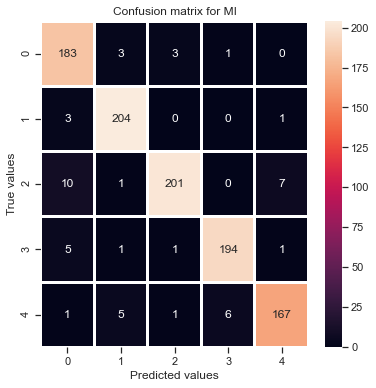

In [234]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print("accuracy after choosing mutual information as feature selection in KNN is: ",accuracy_score(actual1, pred_mi))
import seaborn as sns
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cm_mi = confusion_matrix(actual1, pred_mi)
print("Confusion matrix for MI is: \n",cm_mi)
fig, axes = plt.subplots(figsize=(6,6))
sns.heatmap(cm_mi,annot = True, linewidths=2,fmt=".0f",axes=axes)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion matrix for MI")
plt.show()


accuracy after choosing tf_idf as feature selection in KNN is:  0.94994994994995
Confusion matrix for MI is: 
 [[183   3   2   0   2]
 [  3 203   0   1   1]
 [ 12   2 198   0   7]
 [  4   1   0 194   3]
 [  1   3   2   3 171]]


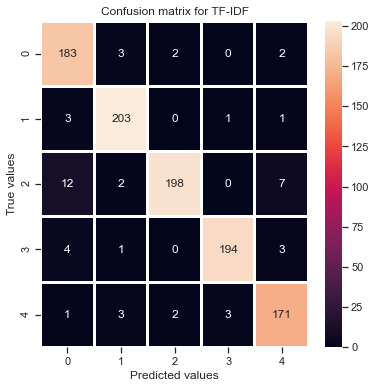

In [225]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(style="ticks", color_codes=True)
print("accuracy after choosing tf_idf as feature selection in KNN is: ",accuracy_score(actual1, pred_tfidf))
cm_tf_idf = confusion_matrix(actual1, pred_tfidf)
print("Confusion matrix for MI is: \n",cm_tf_idf)
fig, axes = plt.subplots(figsize=(6,6))
sns.heatmap(cm_tf_idf,annot = True, linewidths=2,fmt=".0f",axes=axes)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion matrix for TF-IDF")
plt.show()

Text(0.5, 1.0, 'Accuracy vs K using MI as feature selection for KNN')

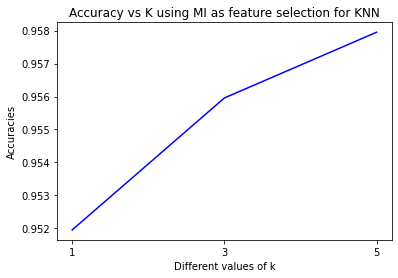

In [4]:
import matplotlib.pyplot as plt
a=[0.9519519519519519,0.955955955955956,0.957950950950951]

p=["1", "3", "5"]

plt.plot(p, a,color="blue")
plt.xlabel("Different values of k")
plt.ylabel("Accuracies")
plt.title("Accuracy vs K using MI as feature selection for KNN")

Text(0.5, 1.0, 'Accuracy vs K using TF-IDF as feature selection for KNN')

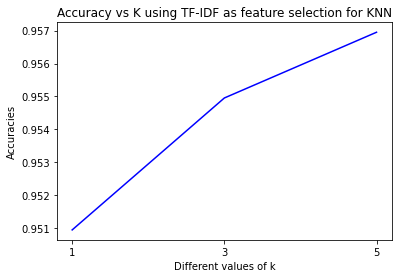

In [7]:
a1=[0.950950950950951, 0.954954954954955,0.95694994994995]
p=["1", "3", "5"]
plt.plot(p, a1,color="blue")
plt.xlabel("Different values of k")
plt.ylabel("Accuracies")
plt.title("Accuracy vs K using TF-IDF as feature selection for KNN")